In this notebook we will use this [dataset](https://www.kaggle.com/competitions/fake-news/overview)

# DATA PREP

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
train_df = pd.read_csv('./gdrive/MyDrive/fake-news/train.csv', index_col='id')
test_df = pd.read_csv('./gdrive/MyDrive/fake-news/test.csv', index_col='id')

In [ ]:
train_df.head(10)

,title,author,text,label
id,,,,
0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,Life: Life Of Luxury: Elton John’s 6 Favorite ...,NaN,Ever wonder how Britain’s most iconic pop pian...,1
7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
8,Excerpts From a Draft Script for Donald Trump’...,NaN,Donald J. Trump is scheduled to make a highly ...,0


In [ ]:
test_df.head(10)

,title,author,text
id,,,
20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...
20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...
20805,Trump is USA's antique hero. Clinton will be n...,NaN,Trump is USA's antique hero. Clinton will be n...
20806,Pelosi Calls for FBI Investigation to Find Out...,Pam Key,"Sunday on NBC’s “Meet the Press,” House Minori..."
20807,Weekly Featured Profile – Randy Shannon,Trevor Loudon,You are here: Home / *Articles of the Bound* /...
20808,Urban Population Booms Will Make Climate Chang...,NaN,Urban Population Booms Will Make Climate Chang...


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20800 entries, 0 to 20799
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   20242 non-null  object
 1   author  18843 non-null  object
 2   text    20761 non-null  object
 3   label   20800 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 812.5+ KB


In [ ]:
train_df.isnull().sum()

,0
title,558
author,1957
text,39
label,0


In [ ]:
train_df[(train_df['text'].isnull()) & (train_df['label'] == 0)]

,title,author,text,label
id,,,,


As we can see, there are no such records where the text is missing, and the record would be considered reliable

In [ ]:
train_df.fillna({'title': 'Unknown', 'author': 'Unknown', 'text': 'not reliable'}, inplace=True)
test_df.fillna({'title': 'Unknown', 'author': 'Unknown', 'text': 'not reliable'}, inplace=True)

In [ ]:
train_df['text'] += train_df['author'] + '. ' + train_df['title'] + '. '
test_df['text'] += test_df['author'] + '. ' + test_df['title'] + '. '

train_df.drop(columns=['title', 'author'], inplace=True)
test_df.drop(columns=['title', 'author'], inplace=True)

train_df.isnull().sum(), test_df.isnull().sum()

(text     0
 label    0
 dtype: int64,
 text    0
 dtype: int64)

In [ ]:
train_df.shape

(20800, 2)

label
1    10413
0    10387
Name: count, dtype: int64


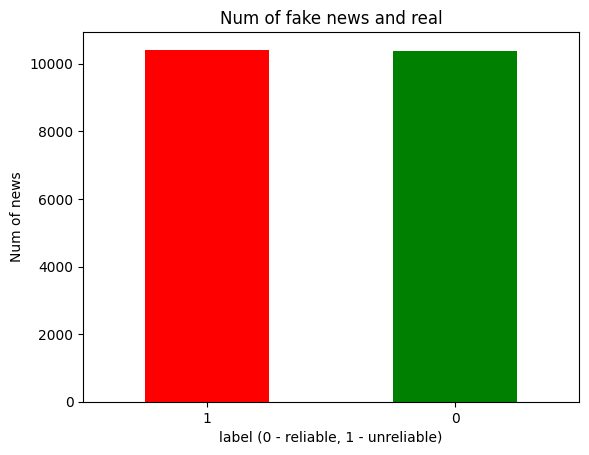

In [ ]:
labels_num = train_df['label'].value_counts()
print(labels_num)
labels_num.plot(kind='bar', color=['red', 'green'])

plt.title('Num of fake news and real')
plt.xlabel('label (0 - reliable, 1 - unreliable)')
plt.ylabel('Num of news')
plt.xticks(rotation=0)
plt.show()

The number of labels is balanced. Accuracy is selected as the metric

In [ ]:
train_df['text'] = train_df['text'].apply(lambda x: str(x).lower())
train_df['text'] = train_df['text'].apply(lambda x: str(x).replace('\n', ' ').replace('\t', ' '))
test_df['text'] = test_df['text'].apply(lambda x: str(x).lower())
test_df['text'] = test_df['text'].apply(lambda x: str(x).replace('\n', ' ').replace('\t', ' '))

In [ ]:
train_df.head()

,text,label
id,,
0,house dem aide: we didn’t even see comey’s let...,1
1,ever get the feeling your life circles the rou...,0
2,"why the truth might get you fired october 29, ...",1
3,videos 15 civilians killed in single us airstr...,1
4,print an iranian woman has been sentenced to ...,1


# Preprocessing

In [ ]:
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from flair.models import TextClassifier
import re

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z0-9]', ' ', text)
    text = re.sub(r'\s+', ' ', text).strip()
    stop_words = set(stopwords.words('english'))
    tokens = text.split()
    filtered_tokens = [token for token in tokens if token not in stop_words]
    text = ' '.join(filtered_tokens)
    lemmatizer = WordNetLemmatizer()
    tokens = text.split()
    lemmanized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    text = ' '.join(lemmanized_tokens)
    return text

def clean_dataframe(df):
    data = df.copy()
    data['clean_text'] = data['text'].apply(preprocess_text)
    # data.reset_index(inplace=True, drop=True)
    return data

In [ ]:
train_df = clean_dataframe(train_df)

In [ ]:
test_df = clean_dataframe(test_df)

In [ ]:
train_df['label'] = '__label__' + train_df['label'].astype(str)

In [ ]:
train_df['label_text'] = train_df['label'] + ' ' + train_df['clean_text']
train_df['label_text'] = train_df['label_text'].str.rstrip()
train_df

,text,label,clean_text,label_text
id,,,,
0,house dem aide: we didn’t even see comey’s let...,__label__1,house dem aide even see comey letter jason cha...,__label__1 house dem aide even see comey lette...
1,ever get the feeling your life circles the rou...,__label__0,ever get feeling life circle roundabout rather...,__label__0 ever get feeling life circle rounda...
2,"why the truth might get you fired october 29, ...",__label__1,truth might get fired october 29 2016 tension ...,__label__1 truth might get fired october 29 20...
3,videos 15 civilians killed in single us airstr...,__label__1,video 15 civilian killed single u airstrike id...,__label__1 video 15 civilian killed single u a...
4,print an iranian woman has been sentenced to ...,__label__1,print iranian woman sentenced six year prison ...,__label__1 print iranian woman sentenced six y...
...,...,...,...,...
20795,rapper t. i. unloaded on black celebrities who...,__label__0,rapper unloaded black celebrity met donald tru...,__label__0 rapper unloaded black celebrity met...
20796,when the green bay packers lost to the washing...,__label__0,green bay packer lost washington redskin week ...,__label__0 green bay packer lost washington re...
20797,the macy’s of today grew from the union of sev...,__label__0,macy today grew union several great name ameri...,__label__0 macy today grew union several great...


Let's divide the training dataset into training and validation parts

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train, dev = train_test_split(train_df, test_size=0.2, random_state=42, stratify=train_df['label'])

In [ ]:
train.to_csv('./fake-news/train_split.txt', columns=['label_text'], index=False, header=False)
dev.to_csv('./fake-news/dev_split.txt', columns=['label_text'], index=False, header=False)
test_df.to_csv('./fake-news/test_split.txt', columns=['label_text'], index=False, header=False)

# Classification

In [ ]:
from flair.embeddings import TransformerDocumentEmbeddings
from flair.models import TextClassifier
from flair.trainers import ModelTrainer
from pathlib import Path
from flair.data import Corpus
from flair.datasets import ClassificationCorpus
from flair.samplers import ImbalancedClassificationDatasetSampler

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [ ]:
data_folder = './gdrive/MyDrive/fake-news/fake_news_refactored/'
label_type = 'label'

corpus: Corpus = ClassificationCorpus(data_folder,
                                      dev_file='dev_split.txt',
                                      train_file='train_split.txt',
                                      test_file=None,
                                      label_type=label_type
                                      )

2024-09-22 19:06:52,750 Reading data from gdrive/MyDrive/fake-news/fake_news_refactored
2024-09-22 19:06:52,753 Train: gdrive/MyDrive/fake-news/fake_news_refactored/train_split.txt
2024-09-22 19:06:52,755 Dev: gdrive/MyDrive/fake-news/fake_news_refactored/dev_split.txt
2024-09-22 19:06:52,756 Test: None
2024-09-22 19:06:53,693 No test split found. Using 10% (i.e. 1664 samples) of the train split as test data
2024-09-22 19:06:53,695 Initialized corpus ./gdrive/MyDrive/fake-news/fake_news_refactored/ (label type name is 'label')


In [ ]:
label_dict = corpus.make_label_dictionary(label_type=label_type)

document_embeddings = TransformerDocumentEmbeddings('distilbert-base-uncased', fine_tune=True)

classifier = TextClassifier(document_embeddings, label_dictionary=label_dict, label_type=label_type)

trainer = ModelTrainer(classifier, corpus)

2024-09-22 19:06:57,512 Computing label dictionary. Progress:


0it [00:00, ?it/s]
14976it [01:46, 140.97it/s]

2024-09-22 19:08:43,779 Dictionary created for label 'label' with 2 values: 1 (seen 7498 times), 0 (seen 7478 times)



/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [ ]:
import torch

In [ ]:
trainer.train('./gdrive/MyDrive/fake-news/model_results/',
              embeddings_storage_mode='gpu',
              learning_rate=1e-3,
              mini_batch_size=32,
              mini_batch_chunk_size=8,
              max_epochs=8
              )

2024-09-22 19:10:15,258 ----------------------------------------------------------------------------------------------------
2024-09-22 19:10:15,277 Model: "TextClassifier(
  (embeddings): TransformerDocumentEmbeddings(
    (model): DistilBertModel(
      (embeddings): Embeddings(
        (word_embeddings): Embedding(30523, 768, padding_idx=0)
        (position_embeddings): Embedding(512, 768)
        (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
        (dropout): Dropout(p=0.1, inplace=False)
      )
      (transformer): Transformer(
        (layer): ModuleList(
          (0-5): 6 x TransformerBlock(
            (attention): MultiHeadSelfAttention(
              (dropout): Dropout(p=0.1, inplace=False)
              (q_lin): Linear(in_features=768, out_features=768, bias=True)
              (k_lin): Linear(in_features=768, out_features=768, bias=True)
              (v_lin): Linear(in_features=768, out_features=768, bias=True)
              (out_lin): Linear(in_fe

/usr/local/lib/python3.10/dist-packages/flair/trainers/trainer.py:84: UserWarning: There should be no best model saved at epoch 1 except there is a model from previous trainings in your training folder. All previous best models will be deleted.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/flair/trainers/trainer.py:499: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = torch.cuda.amp.GradScaler(enabled=use_amp and flair.device.type != "cpu")


2024-09-22 19:11:28,522 epoch 1 - iter 46/468 - loss 0.68408733 - time (sec): 73.18 - samples/sec: 20.11 - lr: 0.001000 - momentum: 0.000000
2024-09-22 19:12:42,702 epoch 1 - iter 92/468 - loss 0.65710766 - time (sec): 147.36 - samples/sec: 19.98 - lr: 0.001000 - momentum: 0.000000
2024-09-22 19:13:54,574 epoch 1 - iter 138/468 - loss 0.63511668 - time (sec): 219.24 - samples/sec: 20.14 - lr: 0.001000 - momentum: 0.000000
2024-09-22 19:15:07,337 epoch 1 - iter 184/468 - loss 0.61870175 - time (sec): 292.00 - samples/sec: 20.16 - lr: 0.001000 - momentum: 0.000000
2024-09-22 19:16:21,314 epoch 1 - iter 230/468 - loss 0.60177225 - time (sec): 365.98 - samples/sec: 20.11 - lr: 0.001000 - momentum: 0.000000
2024-09-22 19:17:33,581 epoch 1 - iter 276/468 - loss 0.58610992 - time (sec): 438.24 - samples/sec: 20.15 - lr: 0.001000 - momentum: 0.000000
2024-09-22 19:18:46,449 epoch 1 - iter 322/468 - loss 0.56863844 - time (sec): 511.11 - samples/sec: 20.16 - lr: 0.001000 - momentum: 0.000000
20

100%|██████████| 65/65 [01:57<00:00,  1.81s/it]

2024-09-22 19:24:35,221 DEV : loss 0.35433995723724365 - f1-score (micro avg)  0.8505


2024-09-22 19:25:02,996  - 0 epochs without improvement
2024-09-22 19:25:03,008 saving best model
2024-09-22 19:25:04,212 ----------------------------------------------------------------------------------------------------
2024-09-22 19:26:19,894 epoch 2 - iter 46/468 - loss 0.36749023 - time (sec): 75.68 - samples/sec: 19.45 - lr: 0.001000 - momentum: 0.000000
2024-09-22 19:27:33,556 epoch 2 - iter 92/468 - loss 0.36410527 - time (sec): 149.34 - samples/sec: 19.71 - lr: 0.001000 - momentum: 0.000000
2024-09-22 19:28:47,119 epoch 2 - iter 138/468 - loss 0.36457180 - time (sec): 222.90 - samples/sec: 19.81 - lr: 0.001000 - momentum: 0.000000
2024-09-22 19:29:59,545 epoch 2 - iter 184/468 - loss 0.35462984 - time (sec): 295.33 - samples/sec: 19.94 - lr: 0.001000 - momentum: 0.000000
2024-09-22 19:31:11,486 epoch 2 - iter 230/468 - loss 0.34951618 - time (sec): 367.27 - samples/sec: 20.04 - lr: 0.001000 - momentum: 0.000000
2024-09-22 19:32:24,621 epoch 2 - iter 276/468 - loss 0.34028436 

100%|██████████| 65/65 [01:59<00:00,  1.84s/it]

2024-09-22 19:39:27,517 DEV : loss 0.22548915445804596 - f1-score (micro avg)  0.9091


2024-09-22 19:39:56,652  - 0 epochs without improvement
2024-09-22 19:39:56,672 saving best model
2024-09-22 19:39:57,662 ----------------------------------------------------------------------------------------------------
2024-09-22 19:41:12,245 epoch 3 - iter 46/468 - loss 0.27158846 - time (sec): 74.58 - samples/sec: 19.74 - lr: 0.001000 - momentum: 0.000000
2024-09-22 19:42:25,570 epoch 3 - iter 92/468 - loss 0.27662067 - time (sec): 147.90 - samples/sec: 19.91 - lr: 0.001000 - momentum: 0.000000
2024-09-22 19:43:39,361 epoch 3 - iter 138/468 - loss 0.26203609 - time (sec): 221.69 - samples/sec: 19.92 - lr: 0.001000 - momentum: 0.000000
2024-09-22 19:44:52,361 epoch 3 - iter 184/468 - loss 0.25762935 - time (sec): 294.69 - samples/sec: 19.98 - lr: 0.001000 - momentum: 0.000000
2024-09-22 19:46:05,381 epoch 3 - iter 230/468 - loss 0.24271380 - time (sec): 367.71 - samples/sec: 20.02 - lr: 0.001000 - momentum: 0.000000
2024-09-22 19:47:18,920 epoch 3 - iter 276/468 - loss 0.23876317 

100%|██████████| 65/65 [01:58<00:00,  1.83s/it]

2024-09-22 19:54:22,053 DEV : loss 0.16853615641593933 - f1-score (micro avg)  0.9373


2024-09-22 19:54:51,147  - 0 epochs without improvement
2024-09-22 19:54:51,159 saving best model
2024-09-22 19:54:52,505 ----------------------------------------------------------------------------------------------------
2024-09-22 19:56:07,549 epoch 4 - iter 46/468 - loss 0.18579086 - time (sec): 75.02 - samples/sec: 19.62 - lr: 0.001000 - momentum: 0.000000
2024-09-22 19:57:19,727 epoch 4 - iter 92/468 - loss 0.19205861 - time (sec): 147.20 - samples/sec: 20.00 - lr: 0.001000 - momentum: 0.000000
2024-09-22 19:58:32,404 epoch 4 - iter 138/468 - loss 0.18854102 - time (sec): 219.88 - samples/sec: 20.08 - lr: 0.001000 - momentum: 0.000000
2024-09-22 19:59:45,141 epoch 4 - iter 184/468 - loss 0.18482682 - time (sec): 292.61 - samples/sec: 20.12 - lr: 0.001000 - momentum: 0.000000
2024-09-22 20:00:58,647 epoch 4 - iter 230/468 - loss 0.18660907 - time (sec): 366.12 - samples/sec: 20.10 - lr: 0.001000 - momentum: 0.000000
2024-09-22 20:02:10,622 epoch 4 - iter 276/468 - loss 0.18745786 

100%|██████████| 65/65 [01:59<00:00,  1.84s/it]

2024-09-22 20:09:12,346 DEV : loss 0.13999705016613007 - f1-score (micro avg)  0.95


2024-09-22 20:09:39,825  - 0 epochs without improvement
2024-09-22 20:09:39,837 saving best model
2024-09-22 20:09:40,747 ----------------------------------------------------------------------------------------------------
2024-09-22 20:10:55,888 epoch 5 - iter 46/468 - loss 0.16144122 - time (sec): 75.13 - samples/sec: 19.59 - lr: 0.001000 - momentum: 0.000000
2024-09-22 20:12:08,851 epoch 5 - iter 92/468 - loss 0.16168383 - time (sec): 148.10 - samples/sec: 19.88 - lr: 0.001000 - momentum: 0.000000
2024-09-22 20:13:22,443 epoch 5 - iter 138/468 - loss 0.16955369 - time (sec): 221.69 - samples/sec: 19.92 - lr: 0.001000 - momentum: 0.000000
2024-09-22 20:14:35,713 epoch 5 - iter 184/468 - loss 0.16997216 - time (sec): 294.96 - samples/sec: 19.96 - lr: 0.001000 - momentum: 0.000000
2024-09-22 20:15:47,830 epoch 5 - iter 230/468 - loss 0.16720486 - time (sec): 367.07 - samples/sec: 20.05 - lr: 0.001000 - momentum: 0.000000
2024-09-22 20:17:01,122 epoch 5 - iter 276/468 - loss 0.16460491 

100%|██████████| 65/65 [01:59<00:00,  1.83s/it]

2024-09-22 20:24:03,894 DEV : loss 0.13644981384277344 - f1-score (micro avg)  0.95


2024-09-22 20:24:32,033  - 0 epochs without improvement
2024-09-22 20:24:32,042 ----------------------------------------------------------------------------------------------------
2024-09-22 20:25:47,832 epoch 6 - iter 46/468 - loss 0.13218200 - time (sec): 75.79 - samples/sec: 19.42 - lr: 0.001000 - momentum: 0.000000
2024-09-22 20:27:01,023 epoch 6 - iter 92/468 - loss 0.13362148 - time (sec): 148.98 - samples/sec: 19.76 - lr: 0.001000 - momentum: 0.000000
2024-09-22 20:28:14,647 epoch 6 - iter 138/468 - loss 0.13936717 - time (sec): 222.60 - samples/sec: 19.84 - lr: 0.001000 - momentum: 0.000000
2024-09-22 20:29:26,898 epoch 6 - iter 184/468 - loss 0.14454931 - time (sec): 294.85 - samples/sec: 19.97 - lr: 0.001000 - momentum: 0.000000
2024-09-22 20:30:40,633 epoch 6 - iter 230/468 - loss 0.14367075 - time (sec): 368.59 - samples/sec: 19.97 - lr: 0.001000 - momentum: 0.000000
2024-09-22 20:31:53,143 epoch 6 - iter 276/468 - loss 0.13764194 - time (sec): 441.10 - samples/sec: 20.02 

100%|██████████| 65/65 [01:59<00:00,  1.83s/it]

2024-09-22 20:38:56,202 DEV : loss 0.20255257189273834 - f1-score (micro avg)  0.9221


2024-09-22 20:39:24,155  - 1 epochs without improvement
2024-09-22 20:39:24,163 ----------------------------------------------------------------------------------------------------
2024-09-22 20:40:38,886 epoch 7 - iter 46/468 - loss 0.13992811 - time (sec): 74.72 - samples/sec: 19.70 - lr: 0.001000 - momentum: 0.000000
2024-09-22 20:41:52,036 epoch 7 - iter 92/468 - loss 0.13739193 - time (sec): 147.87 - samples/sec: 19.91 - lr: 0.001000 - momentum: 0.000000
2024-09-22 20:43:04,861 epoch 7 - iter 138/468 - loss 0.13909153 - time (sec): 220.69 - samples/sec: 20.01 - lr: 0.001000 - momentum: 0.000000
2024-09-22 20:44:17,489 epoch 7 - iter 184/468 - loss 0.13858827 - time (sec): 293.32 - samples/sec: 20.07 - lr: 0.001000 - momentum: 0.000000
2024-09-22 20:45:30,186 epoch 7 - iter 230/468 - loss 0.13444458 - time (sec): 366.02 - samples/sec: 20.11 - lr: 0.001000 - momentum: 0.000000
2024-09-22 20:46:42,703 epoch 7 - iter 276/468 - loss 0.13132410 - time (sec): 438.54 - samples/sec: 20.14 

100%|██████████| 65/65 [01:59<00:00,  1.83s/it]

2024-09-22 20:53:46,618 DEV : loss 0.1094418540596962 - f1-score (micro avg)  0.9608


2024-09-22 20:54:14,795  - 0 epochs without improvement
2024-09-22 20:54:14,801 saving best model
2024-09-22 20:54:15,853 ----------------------------------------------------------------------------------------------------
2024-09-22 20:55:31,421 epoch 8 - iter 46/468 - loss 0.12651057 - time (sec): 75.56 - samples/sec: 19.48 - lr: 0.001000 - momentum: 0.000000
2024-09-22 20:56:44,875 epoch 8 - iter 92/468 - loss 0.11782544 - time (sec): 149.02 - samples/sec: 19.76 - lr: 0.001000 - momentum: 0.000000
2024-09-22 20:57:57,690 epoch 8 - iter 138/468 - loss 0.11379396 - time (sec): 221.83 - samples/sec: 19.91 - lr: 0.001000 - momentum: 0.000000
2024-09-22 20:59:10,070 epoch 8 - iter 184/468 - loss 0.11543551 - time (sec): 294.21 - samples/sec: 20.01 - lr: 0.001000 - momentum: 0.000000
2024-09-22 21:00:23,592 epoch 8 - iter 230/468 - loss 0.11119196 - time (sec): 367.74 - samples/sec: 20.01 - lr: 0.001000 - momentum: 0.000000
2024-09-22 21:01:37,757 epoch 8 - iter 276/468 - loss 0.10978008 

100%|██████████| 65/65 [02:00<00:00,  1.86s/it]

2024-09-22 21:08:44,503 DEV : loss 0.11652302742004395 - f1-score (micro avg)  0.9599


2024-09-22 21:09:12,671  - 1 epochs without improvement
2024-09-22 21:09:13,603 ----------------------------------------------------------------------------------------------------
2024-09-22 21:09:13,607 Loading model from best epoch ...


100%|██████████| 26/26 [00:51<00:00,  1.97s/it]

2024-09-22 21:10:06,907 
Results:
- F-score (micro) 0.9675
- F-score (macro) 0.9675
- Accuracy 0.9675

By class:
              precision    recall  f1-score   support

           0     0.9653    0.9700    0.9676       832
           1     0.9698    0.9651    0.9675       832

    accuracy                         0.9675      1664
   macro avg     0.9676    0.9675    0.9675      1664
weighted avg     0.9676    0.9675    0.9675      1664

2024-09-22 21:10:06,910 ----------------------------------------------------------------------------------------------------


{'test_score': 0.9675480769230769}

In [ ]:
from flair.models import TextClassifier
from flair.data import Sentence

In [ ]:
model = TextClassifier.load('./gdrive/MyDrive/fake-news/model_results/best-model.pt')
model.eval()

TextClassifier(
  (embeddings): TransformerDocumentEmbeddings(
    (model): DistilBertModel(
      (embeddings): Embeddings(
        (word_embeddings): Embedding(30523, 768, padding_idx=0)
        (position_embeddings): Embedding(512, 768)
        (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
        (dropout): Dropout(p=0.1, inplace=False)
      )
      (transformer): Transformer(
        (layer): ModuleList(
          (0-5): 6 x TransformerBlock(
            (attention): MultiHeadSelfAttention(
              (dropout): Dropout(p=0.1, inplace=False)
              (q_lin): Linear(in_features=768, out_features=768, bias=True)
              (k_lin): Linear(in_features=768, out_features=768, bias=True)
              (v_lin): Linear(in_features=768, out_features=768, bias=True)
              (out_lin): Linear(in_features=768, out_features=768, bias=True)
            )
            (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (ffn): 

# Results evaluation

In [ ]:
test_outputs = []

for index, row in test_df.iterrows():
  sentence = row['clean_text']
  sentence = Sentence(sentence)
  model.predict(sentence)
  new_row = {
      'id': index,
      'label': sentence.labels[0].value
  }
  test_outputs.append(new_row)

result_df = pd.DataFrame(test_outputs)

In [ ]:
result_df.to_csv('./gdrive/MyDrive/fake-news/model_results/test_outputs.csv', index=False)

In [ ]:
loss = pd.read_csv('./gdrive/MyDrive/fake-news/model_results/loss.tsv', sep='\t')

In [ ]:
loss

,EPOCH,TIMESTAMP,LEARNING_RATE,TRAIN_LOSS,DEV_LOSS,DEV_PRECISION,DEV_RECALL,DEV_F1,DEV_ACCURACY
0,1,18:35:58,0.0010,0.7534,0.6983,0.5007,0.5007,0.5007,0.5007
1,2,18:50:47,0.0010,0.7080,0.7051,0.5007,0.5007,0.5007,0.5007
2,3,19:05:35,0.0010,0.7059,0.6990,0.5007,0.5007,0.5007,0.5007
3,EPOCH,TIMESTAMP,LEARNING_RATE,TRAIN_LOSS,DEV_LOSS,DEV_PRECISION,DEV_RECALL,DEV_F1,DEV_ACCURACY
4,1,19:25:03,0.0010,0.5266,0.3543,0.8505,0.8505,0.8505,0.8505
5,2,19:39:56,0.0010,0.3172,0.2255,0.9091,0.9091,0.9091,0.9091
6,3,19:54:51,0.0010,0.2294,0.1685,0.9373,0.9373,0.9373,0.9373
7,4,20:09:39,0.0010,0.1795,0.1400,0.9500,0.9500,0.9500,0.9500
8,5,20:24:32,0.0010,0.1565,0.1364,0.9500,0.9500,0.9500,0.9500
9,6,20:39:24,0.0010,0.1372,0.2026,0.9221,0.9221,0.9221,0.9221


In [ ]:
train_loss = [float(i) for i in loss['TRAIN_LOSS'].loc[4:].to_list()]
dev_loss = [float(i) for i in loss['DEV_LOSS'].loc[4:].to_list()]

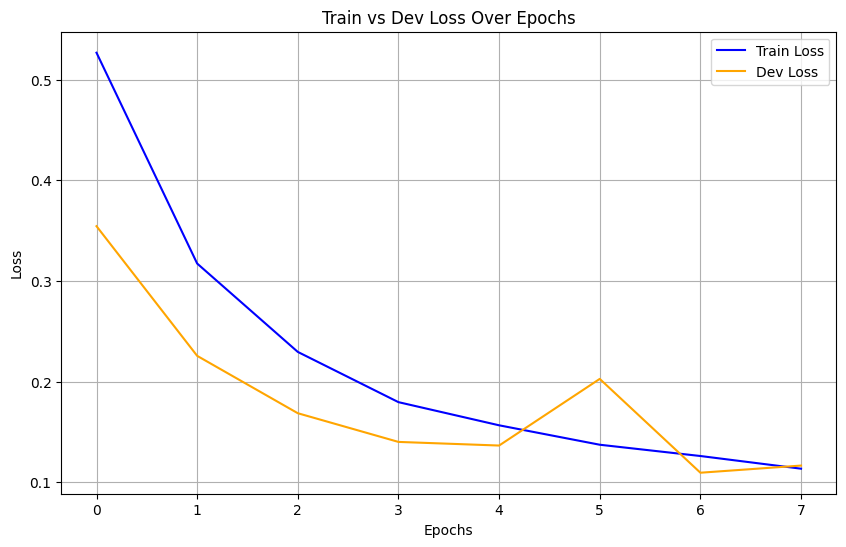

In [ ]:
plt.figure(figsize=(10, 6))

plt.plot(train_loss, label='Train Loss', color='blue')

plt.plot(dev_loss, label='Dev Loss', color='orange')

plt.xlabel('Epochs') 
plt.ylabel('Loss')    
plt.title('Train vs Dev Loss Over Epochs')

plt.legend()

plt.grid(True)

plt.show()